In [2]:
from IPython.display import display, Math, Latex

__Basics of Convolutional Neural network:__

Neural Networks are essentially mathematical models to solve an optimization problem. They are made of neurons, the basic computation unit of neural networks. A neuron takes an input(say x), do some computation on it(say: multiply it with a variable w and adds another variable b ) to produce a value (say; z= wx+b). This value is passed to a non-linear function called activation function(f) to produce the final output(activation) of a neuron. There are many kinds of activation functions. One of the popular activation function is Sigmoid, which is:

\begin{equation}
f(z) = \frac{1}{1+e^{-z}}
\end{equation}
The neuron which uses sigmoid function as an activation function will be called Sigmoid neuron. Depending on the activation functions, neurons are named and there are many kinds of them like RELU, TanH etc(remember this). One neuron can be connected to multiple neurons, like this:
<img src='tutorial_figs/neural_network.png'>


In this example, you can see that the weights are the property of the connection, i.e. each connection has a different weight value while bias is the property of the neuron. This is the complete picture of a sigmoid neuron which produces output y:

\begin{equation}
z = b + \sum_{i} x_iw_i,  \ \ \   y = \frac{1}{1+e^{-z}}
\end{equation}

The rectifier function is 
\begin{equation}
f(x) = x^{+}=max(0,x)
\end{equation}

A smooth approximation to the rectifier is the analytic function

The rectifier function is 
\begin{equation}
f(x) = log(1+e^{-x})
\end{equation}

<img src='tutorial_figs/RELU.png' style ="width:200px">
which is called the softplus or SmoothReLU function. The derivative of softplus is

\begin{equation}
f'(x)={\frac{e^{x}}{1+e^{x}}}={\frac{1}{1+e^{-x}}}
\end{equation} the logistic function. The logistic function is a smooth approximation of the derivative of the rectifier, the Heaviside step function.

The multivariable generalization of single-variable softplus is the LogSumExp with the first argument set to zero: 
\begin{equation}
LSE_{0}^{+} = log(1+e^{x_1}+\cdots+e^{x_n})
\end{equation}

The LogSumExp function itself is:
\begin{equation}
LSE(x_1,\dots,x_n) = log(e^{x_1}+\dots+e^{x_n})
\end{equation}

and its gradient is the softmax; the softmax with the first argument set to zero is the multivariable generalization of the logistic function. Both LogSumExp and softmax are used in machine learning. 

__Layers__

If you stack neurons in a single line, it’s called a  layer; which is the next building block of neural networks.
<img src='tutorial_figs/layers.png' style ="width:200px">

As you can see above, the neurons in green make 1 layer which is the first layer of the network through which input data is passed to the network. Similarly, the last layer is called output layer as shown in red. The layers in between input and output layer are called hidden layers. In this example, we have only 1 hidden layer shown in blue. The networks which have many hidden layers tend to be more accurate and are called deep network and hence machine learning algorithms which uses these deep networks are called deep learning.

__Types of layers:__

Typically, all the neurons in one layer, do similar kind of mathematical operations and that’s how that a layer gets its name(Except for input and output layers as they do little mathematical operations). Here are the most popular kinds of layers you should know about:

__1. Convolutional Layer:__

Convolution is a mathematical operation that’s used in single processing to filter signals, find patterns in signals etc. In a convolutional layer, all neurons apply convolution operation to the inputs, hence they are called convolutional neurons. The most important parameter in a convolutional neuron is the filter size, let’s say we have a layer with filter size $5\ast5\ast3$. Also, assume that the input that’s fed to convolutional neuron is an input image of size of $32\ast 32$ with 3 channels.   
<img src='tutorial_figs/filter.png' style ="width:400px">

Let’s pick one $5\ast 5 \ast 3$ (3 for number of channels in a colored image) sized chunk from image and calculate convolution(dot product) with our filter(w). This one convolution operation will result in a single number as output. We shall also add the bias(b) to this output.

<img src='tutorial_figs/convolution.png' style ="width:400px">

In order to calculate the dot product, it’s mandatory for the 3rd dimension of the filter to be same as the number of channels in the input. i.e. when we calculate the dot product it’s a matrix multiplication of $5\ast5\ast3$ sized chunk with $5\ast5\ast3$ sized filter.
We shall slide convolutional filter over whole input image to calculate this output across the image as shown by a schematic below:
<img src='tutorial_figs/convolution.gif' style ="width:400px">

In this case, we slide our window by 1 pixel at a time. If some cases, people slide the windows by more than 1 pixel. This number is called __stride__. 

If you concatenate all these outputs in 2D, we shall have an output ــactivation mapــ of size $28\ast 28$(can you think of why $28\ast 28$ from $32\ast 32$ with the filter of$5\ast 5$ and stride of 1). Typically, we use more than 1 filter in one convolution layer. If we have 6 filters in our example, we shall have an output of size $28\ast 28\ast 6$.

As you can see, after each convolution, the output reduces in size(as in this case we are going from $32\ast 32$ to $28\ast 28$). In a deep neural network with many layers, the output will become very small this way, which doesn’t work very well. So, it’s a standard practice to add zeros on the boundary of the input layer such that the output is the same size as input layer. So, in this example, if we add a padding of size 2 on both sides of the input layer, the size of the output layer will be $32\ast 32 \ast 6$ which works great from the implementation purpose as well. Let’s say you have an input of size $N\ast N$, filter size is F, you are using *S* as stride and input is added with 0 pad of size _P_. Then, the output size will be:
\begin{equation}
\frac{(N-F+2P)}{S} +1
\end{equation}


__2. Pooling Layer:__

Pooling layer is mostly used immediately after the convolutional layer to reduce the spatial size (only width and height, not depth). This reduces the number of parameters, hence computation is reduced. Also, less number of parameters avoid overfitting(don’t worry about it now, will describe it little later). The most common form of pooling is Max pooling where we take a filter of size $F\ast F$ and apply the maximum operation over the $F\ast F$ sized part of the image.
<img src='tutorial_figs/pool.jpg' style ="width:400px">

If you take the average in place of taking maximum, it will be called average pooling, but it’s not very popular.

If your input is of size $w_1 \ast h_1 \ast d_1 $ and the size of the filter is $f \ast f$ with stride S. Then the output sizes $w_2 \ast h_2 \ast d_2$ will be:

\begin{equation}
w_2= \frac {w_1-f}{S} +1 \\
h_2=\frac{h_1-f}{S} +1 \\
d_2=d_1
\end{equation}
Most common pooling is done with the filter of size $2 \ast 2$ with a stride of 2. As you can calculate using the above formula, it essentially reduces the size of input by half.
<img src='tutorial_figs/half_pool.jpg' style ="width:400px">

__3. Fully Connected Layer:__

If each neuron in a layer receives input from all the neurons in the previous layer, then this layer is called fully connected layer. The output of this layer is computed by matrix multiplication followed by bias offset.

__Understanding Training process:__

Deep neural networks are nothing but mathematical models of intelligence which to a certain extent mimic human brains. When we are trying to train a neural network, there are two fundamental things we need to do:

__1. The Architecture of the network:__

When designing the architecture of a neural network you have to decide on: How do you arrange layers? which layers to use? how many neurons to use in each layer etc.? Designing the architecture is slightly complicated and advanced topic and takes a lot of research. There are many standard architectures which work great for many standard problems. Examples being AlexNet, GoogleNet, InceptionResnet, VGG etc. In the beginning, you should only use the standard network architectures. You could start designing networks after you get a lot of experience with neural nets. Hence, let’s not worry about it now.

__2. Correct weights/parameters:__

Once you have decided the architecture of the network; the second biggest variable is the weights(w) and biases(b) or the parameters of the network. The __objective of the training__ is to get the best possible values of the all these parameters which solve the problem reliably. For example, when we are trying to build the classifier between dog and cat, we are looking to find parameters such that output layer gives out probability of dog as 1(or at least higher than cat) for all images of dogs and probability of cat as 1((or at least higher than dog) for all images of cats. 

You can find the best set of parameters using a process called __Backward propagation__, i.e. you start with a random set of parameters and keep changing these weights such that for every training image we get the correct output. There are many optimizer methods to change the weights that are mathematically quick in finding the correct weights. GradientDescent is one such method(Backward propagation and optimizer methods to change the gradient is a very complicated topic. But we don’t need to worry about it now as Tensorflow takes care of it).

So, let’s say, we start with some initial values of parameters and feed 1 training image(in reality multiple images are fed together) of dog and we calculate the output of the network as 0.1 for it being a dog and 0.9 of it being a cat. Now, we do backward propagation to __slowly change__ the parameters such that the probability of this image being a dog increases in the next iteration. There is a variable that is used to govern how fast do we change the parameters of the network during training, it’s called __learning rate__.  If you think about it, we want to maximise the total correct classifications by the network i.e. we care for the whole training set; we want to make these changes such that the number of correct classifications by the network increases. So we define a single number called __cost__ which indicates if the training is going in the right direction. Typically cost is defined in such a way that; as the cost is reduced, the accuracy of the network increases. So, we keep an eye on the cost and we keep doing many iterations of forward and backward propagations(10s of thousands sometimes) till cost stops decreasing. There are many ways to define cost. One of the simple one is __mean root square cost__. Let’s say $y_{prediction}$ is the vector containing the output of the network for all the training images and $y_{actual}$ is the vector containing actual values(also called ground truth) of these labeled images. So, if we minimize the distance between these two variables, it would be a good indicator of the training. So, we define the cost as the average of these distances for all the images:

\begin{equation}
cost=0.5 \sum_{i=0}^{n}(y_{actual}−y_{prediction})^2
\end{equation}


This is a very simple example of cost, but in actual training, we use much more complicated cost measures, like __cross-entropy__ cost. But Tensorflow implements many of these costs so we don’t need to worry about the details of these costs at this point in time.

After training is done, these parameters and architecture will be saved in a binary file(called __model__). In production set-up when we get a new image of dog/cat to classify, we load this model in the same network architecture and calculate the probability of the new image being a cat/dog. This is called __inference or prediction__.

For computational simplicity, not all training data is fed to the network at once. Rather, let’s say we have total 1600 images, we divide them in small __batches__ say of size 16 or 32 called batch-size. Hence, it will take 100 or 50 rounds(iterations) for complete data to be used for training. This is called one epoch, i.e. in one epoch the networks sees all the training images once. There are a few more things that are done to improve accuracy but let’s not worry about everything at once.

__Building a small Neural network based image classifier:__

Network that we will implement in this tutorial is smaller and simpler (than the ones that are used to solve real-world problems) so that you can train this on your cpu as well. While training, images from both the classes(dogs/cats) are fed to a convolutional layer which is followed by 2 more convolutional layers. After convolutional layers, we flatten the output and add two fully connected layer in the end. The second fully connected layer has only two outputs which represent the probability of an image being a cat or a dog.
<img src='tutorial_figs/steps.jpg' style ="width:800px">

In the first part we are just trying to filter our images with the kernel proposed in 

In [2]:
import tensorflow as tf
 
a = tf.truncated_normal([16,128,128,3])
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.shape(a))

array([ 16, 128, 128,   3], dtype=int32)

__Training data__: we shall use 80% i.e. 0 images for training.

__Validation data__: 20% images will be used for validation. These images are taken out of training data to calculate accuracy independently during the training process.
__Test set__: separate independent data for testing which has around 400 images. Sometimes due to something called Overfitting; after training, neural networks start working very well on the training data(and very similar images) i.e. the cost becomes very small, but they fail to work well for other images. For example, if you are training a classifier between dogs and cats and you get training data from someone who takes all images with white backgrounds. It’s possible that your network works very well on this validation data-set, but if you try to run it on an image with a cluttered background, it will most likely fail. So, that’s why we try to get our test-set from an independent source.


In [11]:
import os
import glob
import numpy as np
import cv2 #opencv-python intereference
from sklearn.utils import shuffle


def load_train(train_path, image_size, classes):
    images = []
    labels = []
    ids = []
    cls = []

    print('Reading training images')
    for fld in classes:   # assuming data directory has a separate folder for each class,
                          # and that each folder is named after the class
        index = classes.index(fld)
        print('Loading {} files (Index: {})'.format(fld, index))
        path = os.path.join(train_path, fld, '*g')
        files = glob.glob(path)
        for fl in files:
            image = cv2.imread(fl)
            image = cv2.resize(image, (image_size, image_size), cv2.INTER_LINEAR)
            images.append(image)
            label = np.zeros(len(classes))
            label[index] = 1.0
            labels.append(label)
            flbase = os.path.basename(fl)
            ids.append(flbase)
            cls.append(fld)
    images = np.array(images)
    labels = np.array(labels)
    ids = np.array(ids)
    cls = np.array(cls)

return images, labels, ids, cls

def load_test(test_path, image_size):
  path = os.path.join(test_path, '*g')
  files = sorted(glob.glob(path))

  X_test = []
  X_test_id = []
  print("Reading test images")
  for fl in files:
      flbase = os.path.basename(fl)
      img = cv2.imread(fl)
      img = cv2.resize(img, (image_size, image_size), cv2.INTER_LINEAR)
      X_test.append(img)
      X_test_id.append(flbase)

  ### because we're not creating a DataSet object for the test images, normalization happens here
  X_test = np.array(X_test, dtype=np.uint8)
  X_test = X_test.astype('float32')
  X_test = X_test / 255

  return X_test, X_test_id



class DataSet(object):

  def __init__(self, images, labels, ids, cls):
    """Construct a DataSet. one_hot arg is used only if fake_data is true."""

    self._num_examples = images.shape[0]


    # Convert shape from [num examples, rows, columns, depth]
    # to [num examples, rows*columns] (assuming depth == 1)
    # Convert from [0, 255] -> [0.0, 1.0].

    images = images.astype(np.float32)
    images = np.multiply(images, 1.0 / 255.0)

    self._images = images
    self._labels = labels
    self._ids = ids
    self._cls = cls
    self._epochs_completed = 0
    self._index_in_epoch = 0

  @property
  def images(self):
    return self._images

  @property
  def labels(self):
    return self._labels

  @property
  def ids(self):
    return self._ids

  @property
  def cls(self):
    return self._cls

  @property
  def num_examples(self):
    return self._num_examples

  @property
  def epochs_completed(self):
    return self._epochs_completed

  def next_batch(self, batch_size):
    """Return the next `batch_size` examples from this data set."""
    start = self._index_in_epoch
    self._index_in_epoch += batch_size

    if self._index_in_epoch > self._num_examples:
      # Finished epoch
      self._epochs_completed += 1

      # # Shuffle the data (maybe)
      # perm = np.arange(self._num_examples)
      # np.random.shuffle(perm)
      # self._images = self._images[perm]
      # self._labels = self._labels[perm]
      # Start next epoch

      start = 0
      self._index_in_epoch = batch_size
      assert batch_size <= self._num_examples
    end = self._index_in_epoch

    return self._images[start:end], self._labels[start:end], self._ids[start:end], self._cls[start:end]


def read_train_sets(train_path, image_size, classes, validation_size=0):
  class DataSets(object):
    pass
  data_sets = DataSets()

  images, labels, ids, cls = load_train(train_path, image_size, classes)
  images, labels, ids, cls = shuffle(images, labels, ids, cls)  # shuffle the data

  if isinstance(validation_size, float):
    validation_size = int(validation_size * images.shape[0])

  validation_images = images[:validation_size]
  validation_labels = labels[:validation_size]
  validation_ids = ids[:validation_size]
  validation_cls = cls[:validation_size]

  train_images = images[validation_size:]
  train_labels = labels[validation_size:]
  train_ids = ids[validation_size:]
  train_cls = cls[validation_size:]

  data_sets.train = DataSet(train_images, train_labels, train_ids, train_cls)
  data_sets.valid = DataSet(validation_images, validation_labels, validation_ids, validation_cls)

  return data_sets


def read_test_set(test_path, image_size):
  images, ids  = load_test(test_path, image_size)
return images, ids

######Code starts here
classes = ['focused', 'non_focused']
num_classes = len(classes)

train_path='training_data'

# validation split
validation_size = 0.2

# batch size
batch_size = 16

data = dataset.read_train_sets(train_path, img_size, classes, validation_size=validation_size)

NameError: name 'images' is not defined

This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:

<img src='tutorial_figs/Canny_thresholds.jpg' style ="width:400px">>


Here, I am adding the information of Nicholay's files to sum up at the end.
First, refer to the CellDetection.html we need some packages as follows:


[0 0 0 ... 2 2 2]
(1104, 1104)


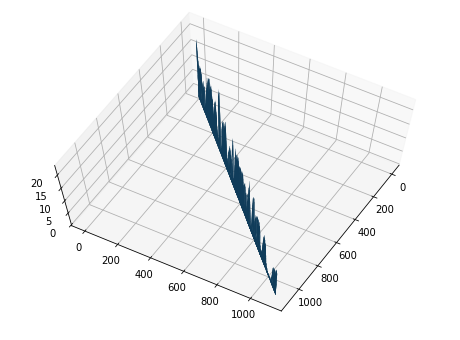

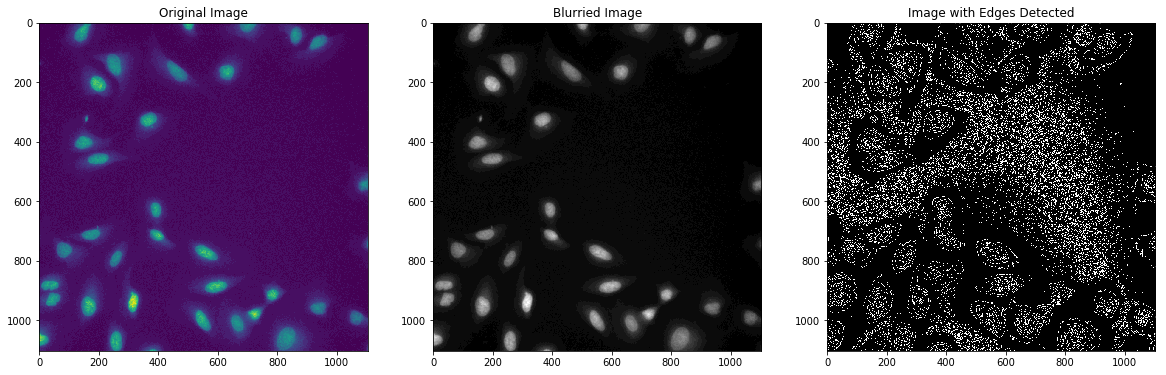

(1104, 1104, 3)
(1104, 1104, 3)
(1104, 1104, 3)
0
1
2


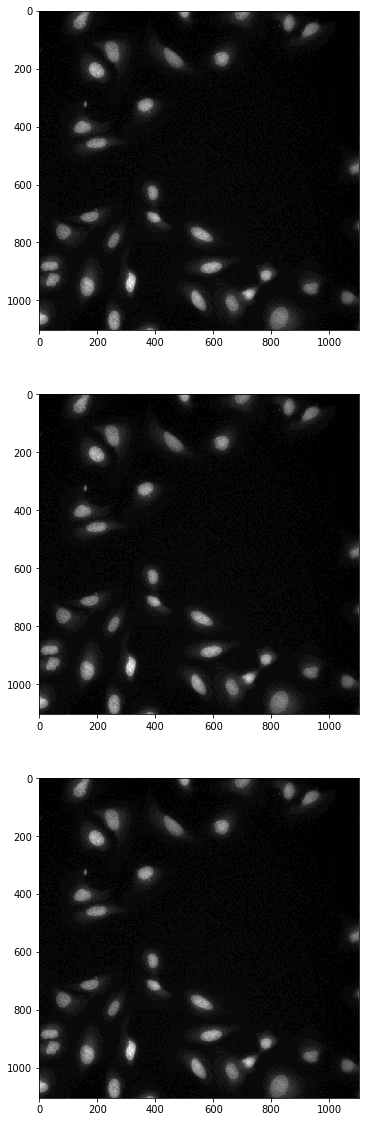

In [241]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.feature import blob_dog, blob_log, blob_doh
from mpl_toolkits.mplot3d.axes3d import Axes3D




images = glob.glob('./images/f00/*.tiff')
    
img = []
for i in images:
    img.append(cv2.imread(i))



# convert the image to grayscale, blur it, and find edges in the image
gray = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

edged = cv2.Canny(gray, 0,0)
print(gray[1:1104,1])
np.savetxt('test.txt', edged)



#####################################

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(range(0,len(edged)), range(0,len(edged)),gray)
ax.view_init(70, 30)



print(gray.shape)
#######################################



# show the original image and the edge detected image
plt.figure(figsize = (20,20))
plt.subplot(131)
plt.imshow(img[0][:,:,1])
plt.title('Original Image')
plt.subplot(132)
plt.imshow(gray,cmap='gray')
plt.title('Blurried Image')
plt.subplot(133)
plt.imshow(edged,cmap='gray')
plt.title('Image with Edges Detected')
plt.show()


    
for j in range(0,len(img)):
    print(img[j].shape)
    
fig, ax = plt.subplots(len(images),1,figsize=(20,20))    
    
for i in range(0, len(img)):
    print(i)
    ax[i].imshow(img[i][:,:,i], cmap=plt.cm.gray)
    #ax[i].imshow(img[i], cmap=plt.cm.gray)



    

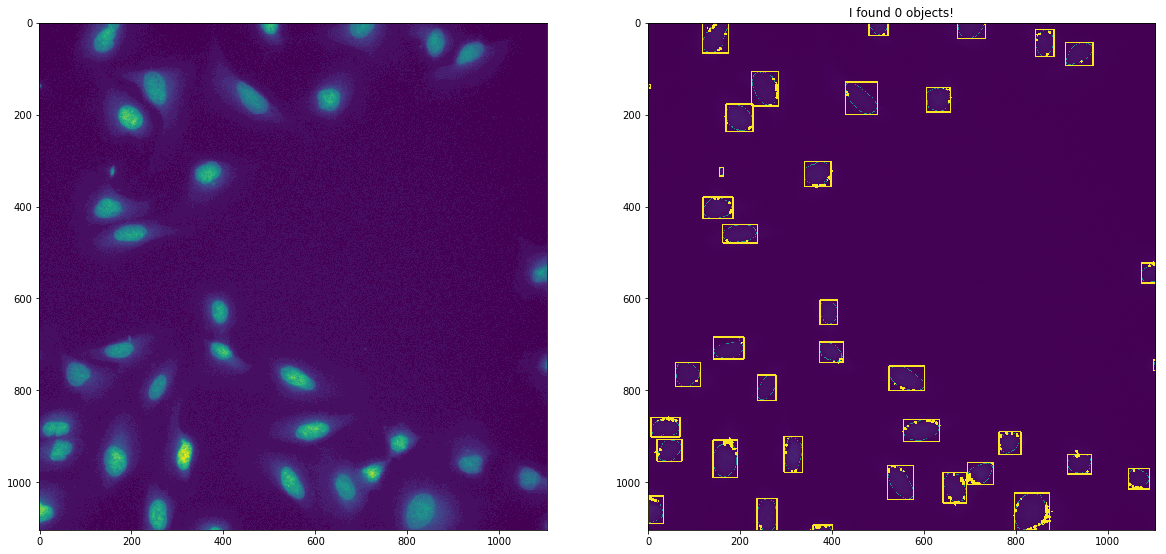

In [293]:
fig = plt.figure(figsize=(20, 15))
plt.subplot(121)
plt.imshow(img[0][:,:,0])


imCopy = img[0][:,:,0].copy()
imgray=cv2.cvtColor(img[0],cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,20)

print()
contours, hierarchy =  cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
cv2.drawContours(imCopy,contours,-1,(127,0,127))

for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    roi = img[0][y:y + h, x:x + w,0]
    cv2.rectangle(imCopy, (x, y), (x + w, y + h), (255,255,255), 2)

plt.subplot(122)
blobs_log = blob_log(imgray, max_sigma=10, num_sigma=10, threshold=.1)

text = "I found {} objects!".format(len(blobs_log))
#cv2.putText(imCopy, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
plt.title(text)
plt.imshow(imCopy)
plt.show()
